In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
db = pd.read_csv('mountains_db.tsv', sep='\t', header=None, names=['Name', 'Height', 'Country', 'ISO'])

In [4]:
print(f"Numarul de tari: {len(db['ISO'].value_counts())}")

Numarul de tari: 256


In [5]:
print(f"Numarul de munti cu inaltime nenula: {len(db[db["Height"].notnull()]["Height"].tolist())}")

Numarul de munti cu inaltime nenula: 53152


In [6]:
print(f"Inaltime minina: {db['Height'].min()} \nInaltime maxima: {db['Height'].max()}")
print(f"Inaltime medie: {db['Height'].mean()} \nInaltime mediana: {db['Height'].median()}")

Inaltime minina: 0.0 
Inaltime maxima: 8172.0
Inaltime medie: 1286.2325302904876 
Inaltime mediana: 984.0


In [7]:
iso_dict = {}
for iso in db["ISO"]:
    if iso not in iso_dict:
        iso_dict[iso] = 1
    iso_dict[iso] += 1

<BarContainer object of 256 artists>

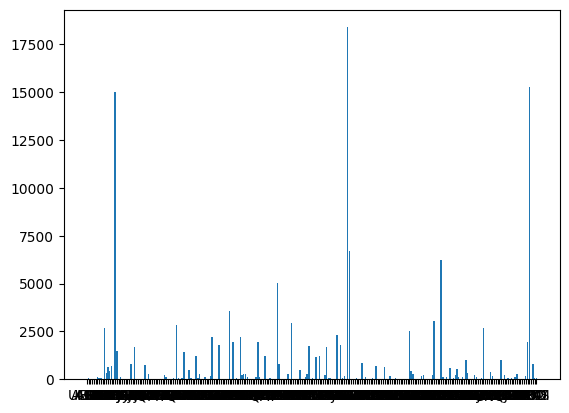

In [8]:
plt.bar(iso_dict.keys(), iso_dict.values())

In [9]:
iso_max_h = {}

for iso in db["ISO"].unique():
    iso_max_h[iso] = db[db["ISO"] == iso]["Height"].max()

<BarContainer object of 256 artists>

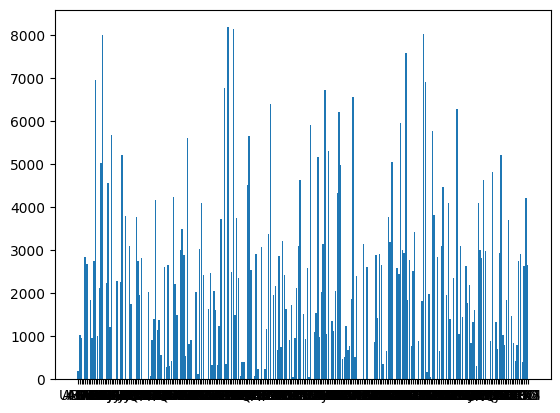

In [10]:
plt.bar(iso_max_h.keys(), iso_max_h.values())

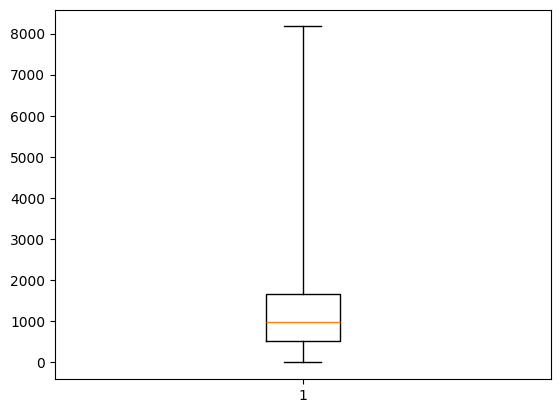

In [18]:
plt.boxplot(db["Height"].dropna(), whis=[0, 100])
plt.show()

In [ ]:
countries_db = pd.read_csv("countries_db.tsv", sep="\t", header=None, names=["ISO", "Continent"])
new_db = pd.merge(db, countries_db, how="inner").dropna()

def get_height_by_continent(continent: str):
    return new_db[new_db["Continent"] == continent]["Height"]

eu_mt = get_height_by_continent("Europe")
as_mt = get_height_by_continent("Asia")
na_mt = get_height_by_continent("North America")
sa_mt = get_height_by_continent("South America")
oc_mt = get_height_by_continent("Australia/Oceania")
af_mt = get_height_by_continent("Africa")

continents = [eu_mt, as_mt, na_mt, sa_mt, oc_mt, af_mt]


C:\Users\Toni\AppData\Local\Temp\ipykernel_16268\1199411983.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(continents, labels=["Europe", "Asia", "NA", "SA", "Oceania", "Africa"], whis=[0, 100])


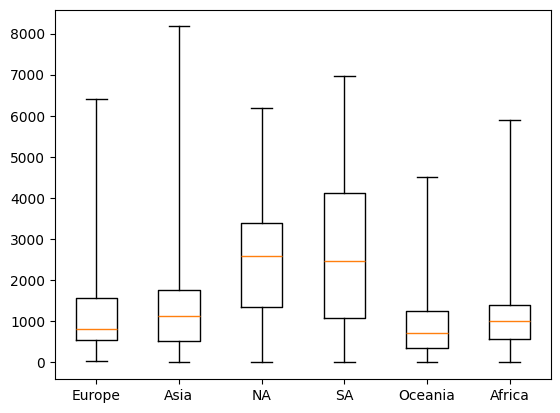

In [23]:
plt.boxplot(continents, labels=["Europe", "Asia", "NA", "SA", "Oceania", "Africa"], whis=[0, 100])
plt.show()